In [26]:
# Import libraries

import pandas as pd
import numpy as np
import random as rnd
import sklearn as skl
import seaborn as sn
import matplotlib.pyplot as plt
import sympy as sp
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, silhouette_score
from scipy.stats import chi2_contingency
import warnings
from IPython.display import display, Math
from pickle import dump

warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,.3f}'.format
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [27]:
# Import data
dfHousing_raw = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=439&path=housing.csv")

In [28]:
# Data inspection

print(dfHousing_raw.shape)
print(dfHousing_raw.info())

# Verify duplicates and NANs

if dfHousing_raw.duplicated().any().any():
    dfHousing_raw = dfHousing_raw.drop_duplicates()

if dfHousing_raw.isna().any().any():
    dfHousing_raw = dfHousing_raw.dropna()

(20640, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [29]:
# Removing package_name column as it is not relevant for the analysis
dfHousing_processed = dfHousing_raw[["MedInc","Latitude","Longitude"]]

In [30]:
# Normalize data
X = dfHousing_processed
Xnorm = (X - X.mean())/(X.std())

# Split data
X_train, X_test = train_test_split(Xnorm, random_state = 42, train_size = 0.7)

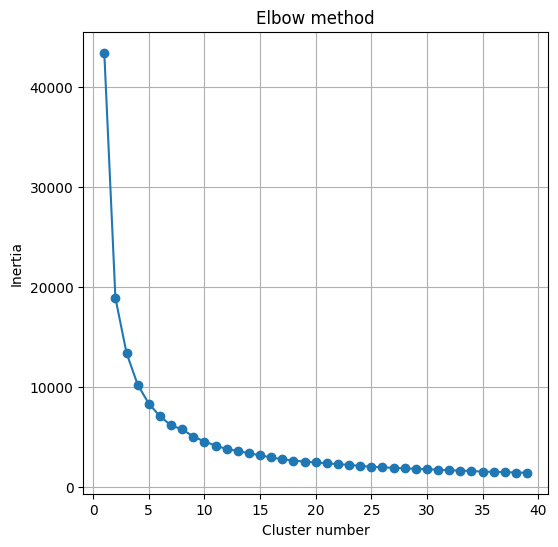

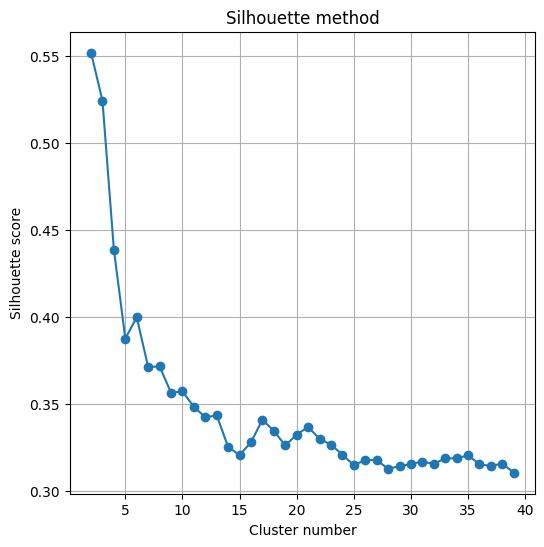

In [32]:
## Check best number of clusters for the model

# Elbow method

nk = []

for k in range(1,40):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=42)
    kmeans.fit(X_train)
    nk.append(kmeans.inertia_)

# Elbow plot
plt.figure(figsize=(6, 6))
plt.plot(range(1, 40), nk, marker='o')
plt.title('Elbow method')
plt.xlabel('Cluster number')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Silhouette score

ss = []
for k in range(2, 40):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=42)
    kmeans.fit(X_train)

    X_prediction = kmeans.predict(X_test)
    silhouette_avg = silhouette_score(X_test, X_prediction)
    ss.append(silhouette_avg)

# Gráfico del silhouette
plt.figure(figsize=(6, 6))
plt.plot(range(2, 40), ss, marker='o')
plt.title('Silhouette method')
plt.xlabel('Cluster number')
plt.ylabel('Silhouette score')
plt.grid()
plt.show();

In [ ]:
# K-means clustering

best_cluster_number = 5  # From previous analysis

housing_model = KMeans(n_clusters = best_cluster_number, random_state = 42)
housing_model.fit(X_train)

# Perform prediction
y_pred = housing_model.predict(X_test)

14447.999999999998